In [54]:
import datetime
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import utils_config
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (RocCurveDisplay, accuracy_score, f1_score,
                             precision_score, recall_score)
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

configs = utils_config.load_config("../config.json")

In [55]:
red = pd.read_csv(f'{configs.red}', sep=configs.sep)
white = pd.read_csv(f'{configs.white}', sep=configs.sep)

In [56]:
red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [57]:
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


____________________

#### 3) Descreva as variáveis:

*type* = Tipo do vinho cadatrado na base. White (branco) ou Red (Tinto)     **| Variável Contínua**  
*fixed acidity* = Quantidade de Ácido Tartárico (g/dm³)                     **| Variável Contínua**   
*volatile acidity* = Quantidade de Ácido Acético (g/dm³)                    **| Variável Contínua**   
*citric acid* = Quantidade de Ácido Cítrico (g/dm³)                         **| Variável Contínua**   
*residual sugar* = Quantidade de Açucar Residual (g/dm³)                    **| Variável Contínua**   
*chlorides* = Quantidade de Cloreto de Sódio (g/dm³)                        **| Variável Contínua**   
*free sulfur dioxide* = Quantidade de Dióxido de Enxofre livre (mg/dm³)     **| Variável Contínua**   
*total sulfur dioxide* = Quantidade total de Dióxido de Enxofre (md/dm³)    **| Variável Contínua**   
*density* = Densidade (g/cm³)                                               **| Variável Contínua**   
*ph* = Ph                                                                   **| Variável Contínua**   
*sulphates* = Quantidade de Sulfato de Potássio (g/dm³)                     **| Variável Contínua**  
*alcohol* = Alcool (% vol.)                                                 **| Variável Contínua**   
*quality* = Qualidade do vinho de 0 a 10                                    **| Variável Categórica**


_______________________

#### Média e Desvio Padrão - Vinhos Tinto

In [58]:
red.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


___________________

#### Média e Desvio Padrão Vinhos Verde

In [59]:
white.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


_________________

#### Distribuição da variável "Quality" - Vinhos Verde Tintos

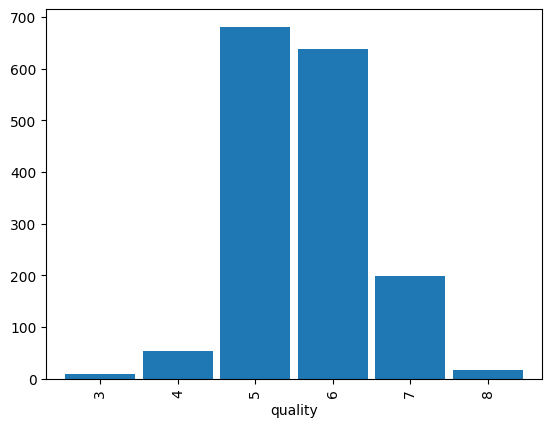

In [60]:
_ = red.quality.value_counts().sort_index().plot.bar(width=0.9)

__________________
#### Distribuição da variável "Quality" - Vinhos Verde Brancos

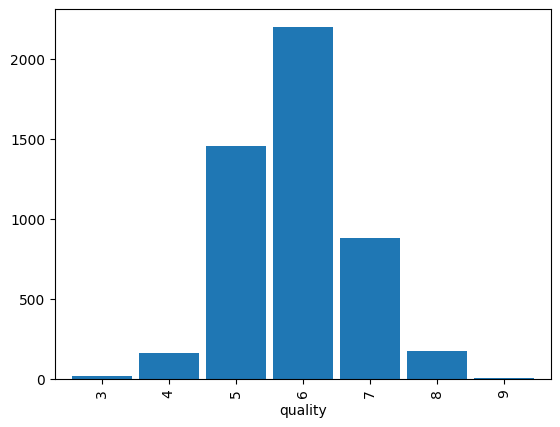

In [61]:
_ = white.quality.value_counts().sort_index().plot.bar(width=0.9)

__________________

#### Correlação das variáves - Vinhos Verde Tintos

In [62]:
red.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


__________________

#### Correlação das variáves - Vinhos Verde Brancos

In [63]:
white.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


__________________ 
#### Models

In [64]:
vars = [
        'fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol',
            ]

In [100]:
def base(base, vars):
    list_arq = os.listdir(path='../data/')
    for name in list_arq:
        if base in name:
            wines = pd.read_csv(f'../data/{name}', sep=configs.sep)
            wines["category"] = (wines['quality'] > configs.bad_wine_upper_bound).astype(float)
            X = wines[vars]
            y = wines['category']
            return X, y
        elif base in name:
            white = pd.read_csv(f'../data/{name}', sep=configs.sep)
            white["category"] = (white['quality'] > configs.bad_wine_upper_bound).astype(float)
            X = white[vars]
            y = white['category']
            return X, y
        elif base in name:
            red = pd.read_csv(f'../data/{name}', sep=configs.sep)
            red["category"] = (red['quality'] > configs.bad_wine_upper_bound).astype(float)
            X = red[vars]
            y = red['category']
            return X, y

In [66]:
config = [
    (SVC, {'kernel': 'rbf'}),
    (SVC, {'kernel': 'rbf', 'gamma': 2}),
    (SVC, {'degree': 3, 'kernel': 'poly'} ),
    (SVC, {'degree': 5, 'kernel': 'poly'} ),
    (SVC, {'degree': 10, 'kernel': 'poly'} ),
    (LogisticRegression, {}),
    (DecisionTreeClassifier, {'min_samples_leaf': 50})
    ]

In [101]:
var = 'white'
X, y = base(var, vars)

In [68]:
y.value_counts().sort_values()

category
0.0    1640
1.0    3258
Name: count, dtype: int64

In [69]:
test_size = 0.2
random_state = 42
stratify = y

X_train_cv, X_test, y_train_cv, y_test = train_test_split(X.values,
                                                          y.values,
                                                          test_size=test_size,
                                                          random_state=random_state,
                                                          stratify=stratify)

In [70]:
def interpolation(fpr, tpr):
    interp_fpr = np.linspace(0, 1, 100)
    interp_tpr = np.interp(interp_fpr, fpr, tpr)
    interp_tpr[0] = 0.
    return interp_fpr, interp_tpr

In [71]:
def train_cv(base, X, y, X_test, y_test, model_klass, model_kwargs = {}):
    day_hour = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')
    cv = StratifiedKFold(n_splits=configs.k_folds)
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    fprs_list = []
    tprs_list = []
    auc_list  = []
    scaler_list = []
    model_list =[]
    f1_score_val_list = []
    f1_score_train_list = []
    acc_train = []
    acc_val = []
    recall_train = []
    recall_val = []
    prec_train = []
    prec_val = []

    train_model = None
    if "SVC" in str(model_klass):
        train_model = "SVC"
    if "Tree" in str(model_klass):
        train_model = "DecisionTree"
    if "Logistic" in str(model_klass):
        train_model = "LogisticRegression" 
    
    with open(f"{configs.results}/{train_model}_{day_hour}_{base}.txt", "a") as file:
            file.write(f"""Configs: {model_kwargs}\n""")

    for fold, (train_idx, val_idx) in enumerate(cv.split(X, y)):
        X_train = X[train_idx, :]
        y_train = y[train_idx]
        X_val = X[val_idx, :]
        y_val = y[val_idx]

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        scaler_list.append(scaler)

        model = model_klass(**model_kwargs)
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_train_scaled)
        y_pred_val = model.predict(X_val_scaled)

        with open(f"{configs.results}/{train_model}_{day_hour}_{base}.txt", "a") as file:
            file.write(f"""========================= FOLD {fold} ==========================
        O Resultado da ACURÁCIA em TREINO é: {100 * accuracy_score(y_train, y_pred):.2f}%
        O Resultado da ACURÁCIA na VALIDAÇÃO é: {100 * accuracy_score(y_val, y_pred_val):.2f}%
        O Resultado da SENSIBILIDADE em TREINO é: {100 *  recall_score(y_train, y_pred):.2f}%
        O Resultado da SENSIBILIDADE na VALIDAÇÃO é: {100 *  recall_score(y_val, y_pred_val):.2f}%
        O Resultado da PRECISÃO em TREINO é: {100*  precision_score(y_train, y_pred):.2f}%
        O Resultado da PRECISÃO na VALIDAÇÃO é: {100*  precision_score(y_val, y_pred_val):.2f}%
        O Resultado da de F1-Score em TREINO é: {f1_score(y_train, y_pred):.2}
        O Resultado da de F1-Score na VALIDAÇÃO: {f1_score(y_val, y_pred_val):.2}\n\n""")
        
        acc_train.append(accuracy_score(y_train, y_pred))
        acc_val.append(accuracy_score(y_val, y_pred_val))
        recall_train.append(recall_score(y_train, y_pred))
        recall_val.append(recall_score(y_val, y_pred_val))
        prec_train.append(precision_score(y_train, y_pred))
        prec_val.append(precision_score(y_val, y_pred_val))
        f1_score_train_list.append(f1_score(y_train, y_pred))
        f1_score_val_list.append(f1_score(y_val, y_pred_val))
        model_list.append(model)

        viz = RocCurveDisplay.from_estimator(
            model,
            X_val_scaled,
            y_val,
            ax = ax,
            alpha=0.3,
            lw=1
        )
        interp_fpr, interp_tpr = interpolation(viz.fpr, viz.tpr)
        fprs_list.append(interp_fpr)
        tprs_list.append(interp_tpr)
        auc_list.append(viz.roc_auc)

    with open(f"{configs.results}/{train_model}_{day_hour}_{base}.txt", "a") as file:
            file.write(f"""========================= Resultado Médio =========================
        O resultado Médio da ACURÁCIA em TREINO é: {np.mean(acc_train): .2} +- {np.std(acc_train): .2}
        O resultado Médio da ACURÁCIA em VALIDAÇÃO é: {np.mean(acc_val): .2} +- {np.std(acc_val): .2}
        O resultado Médio da SENSIBILIDADE em TREINO é: {np.mean(recall_train): .2} +- {np.std(recall_train): .2}
        O resultado Médio da SENSIBILIDADE em VALIDAÇÃO é: {np.mean(recall_val): .2} +- {np.std(recall_val): .2}
        O resultado Médio da PRECISÃO em TREINO é: {np.mean(prec_train): .2} +- {np.std(prec_train): .2}
        O resultado Médio da PRECISÃO em VALIDAÇÃO é: {np.mean(prec_val): .2} +- {np.std(prec_val): .2}
        O resultado Médio da F1-Score em TREINO é {np.mean(f1_score_train_list): .2} +- {np.std(f1_score_train_list): .2}
        O resultado Médio da F1-Score em VALIDAÇÃO é: {np.mean(f1_score_val_list): .2} +- {np.std(f1_score_val_list): .2}\n
    ===================================================\n""")

    best_model_idx = np.argmax(f1_score_val_list)
    with open(f"{configs.results}/{train_model}_{day_hour}_{base}.txt", "a") as file:
            file.write(f"""Meu melhor fold é: {best_model_idx}\n""")
            
    best_model = model_list[best_model_idx]
    best_scaler = scaler_list[best_model_idx]
    X_test_scaled = best_scaler.transform(X_test)
    y_pred_test = model.predict(X_test_scaled)

    with open(f"{configs.results}/{train_model}_{day_hour}_{base}.txt", "a") as file:
            file.write(f"""Meu resultado de F1-Score para o conjunto de TESTE é: {f1_score(y_test, y_pred_test):.2}
O resultado Médio da ACURÁCIA em TESTE é: {100 * accuracy_score(y_test, y_pred_test):.2f}%
O resultado Médio da SENSIBILIDADE em TESTE é: {100 * recall_score(y_test, y_pred_test):.2f}%
O resultado Médio da PRECISÃO em TESTE é: {100 * precision_score(y_test, y_pred_test):.2f}%
===================================================\n
===================================================\n""")

    mean_fpr = np.mean(fprs_list, axis=0)
    mean_tpr = np.mean(tprs_list, axis=0)
    mean_auc = np.mean(auc_list)
    std_auc = np.std(auc_list)

    ax.plot(
        mean_fpr,
        mean_tpr,
        color='blue',
        lw=2,
        label=r"Mean ROC (AUC = %.2f $\pm$ %.2f)" %(mean_auc, std_auc)
    )
    ax.plot(np.linspace(0, 1, 100),
            np.linspace(0, 1, 100),
            color='g',
            ls=":",
            lw=0.5)
    ax.legend()

    return best_model, best_scaler

_____________
#### Training Models

_______________
#### Dentre os modelos testados a seguir:
    (SVC, {'kernel': 'rbf'}),
    (SVC, {'kernel': 'rbf', 'gamma': 2}),
    (SVC, {'degree': 3, 'kernel': 'poly'} ),
    (SVC, {'degree': 5, 'kernel': 'poly'} ),
    (SVC, {'degree': 10, 'kernel': 'poly'} ),
    (LogisticRegression, {}),
    (DecisionTreeClassifier, {'min_samples_leaf': 50})
    
#### O melhor resultado foi obtido com o modelo SVC, com kernel = rbf e gamma = 2, com uma AUC = 0.84 +- 0.02 de desvio padrão. As médias de Curva Roc podem ser vistas abaixo, e os arquivos de log podem ser conferidos na pasta "Results"

(SVC(), StandardScaler())

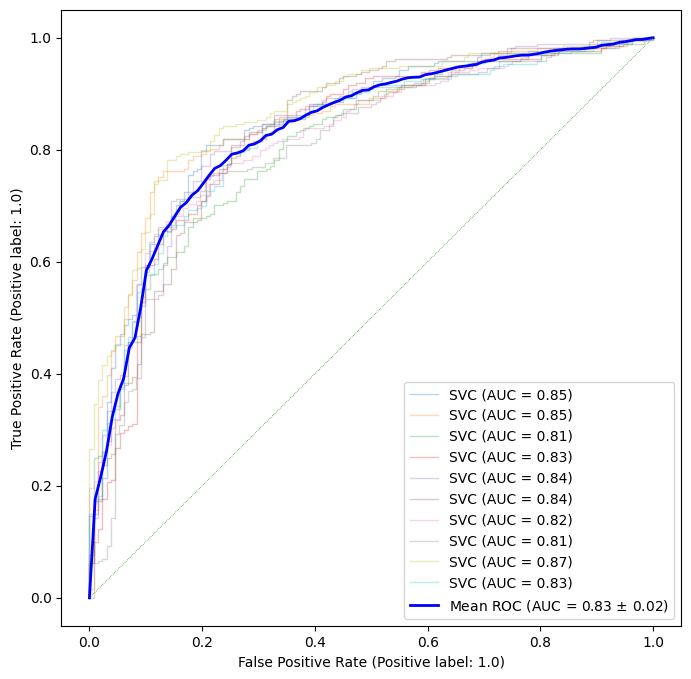

In [72]:
train_cv(var, X_train_cv, y_train_cv, X_test, y_test, config[0][0], config[0][1])

## Melhor modelo

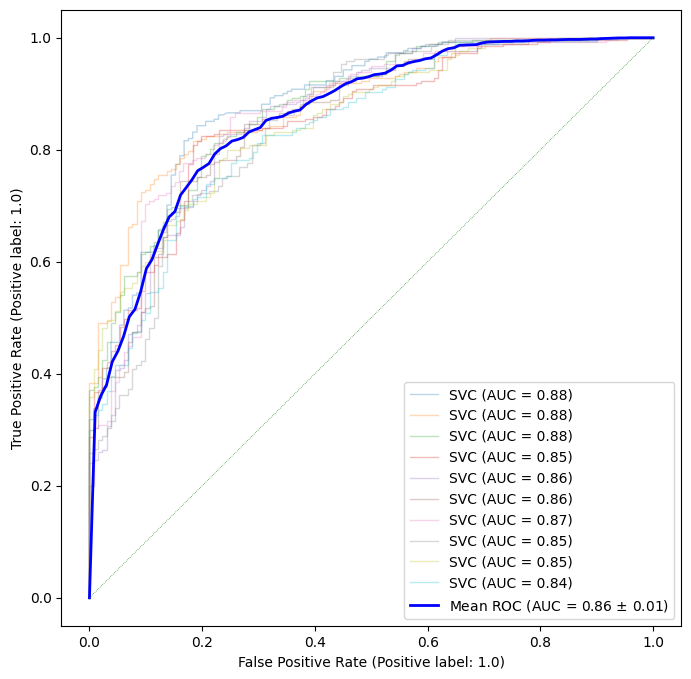

In [73]:
best_model, best_scaler = train_cv(var, X_train_cv, y_train_cv, X_test, y_test, config[1][0], config[1][1])

_________________
#### Predição e distribuição das categorias encontradas pelo modelo

In [77]:
X_scaled = best_scaler.transform(X)

c:\Users\claud\OneDrive\Documentos\Python\Coded\wine-predict\.venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [78]:
y_pred = best_model.predict(X_scaled)

In [79]:
white["pred"] = y_pred

In [80]:
white

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,pred
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1.0
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0.0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1.0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1.0


In [81]:
white['pred'].value_counts().sort_values()

pred
0.0    1361
1.0    3537
Name: count, dtype: int64

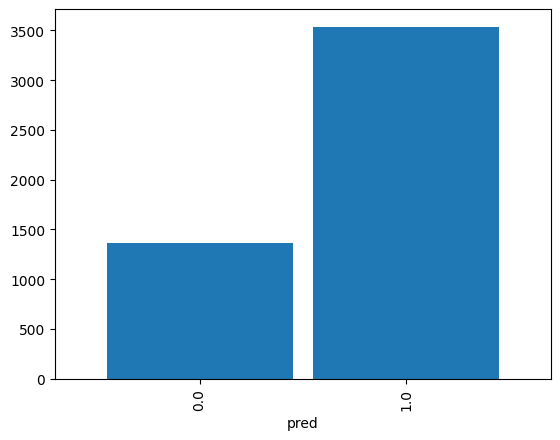

In [82]:
_ = white.pred.value_counts().sort_index().plot.bar(width=0.9)

In [83]:
print(f"""O resultado Médio da ACURÁCIA na Predição é: {100 * accuracy_score(y, y_pred):.2f}%
O resultado Médio da SENSIBILIDADE na Predição é: {100 * recall_score(y, y_pred):.2f}%
O resultado Médio da PRECISÃO na Predição é: {100 * precision_score(y, y_pred):.2f}%
O Resultado da de F1-Score na Predição: {f1_score(y, y_pred):.2}""")

O resultado Médio da ACURÁCIA na Predição é: 93.24%
O resultado Médio da SENSIBILIDADE na Predição é: 99.20%
O resultado Médio da PRECISÃO na Predição é: 91.38%
O Resultado da de F1-Score na Predição: 0.95


_________________

(SVC(kernel='poly'), StandardScaler())

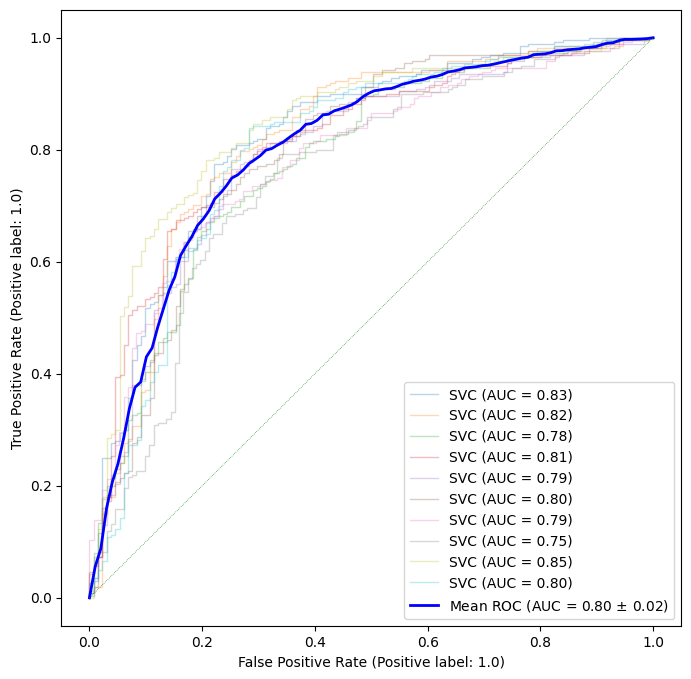

In [84]:
train_cv(var, X_train_cv, y_train_cv, X_test, y_test, config[2][0], config[2][1])

(SVC(degree=5, kernel='poly'), StandardScaler())

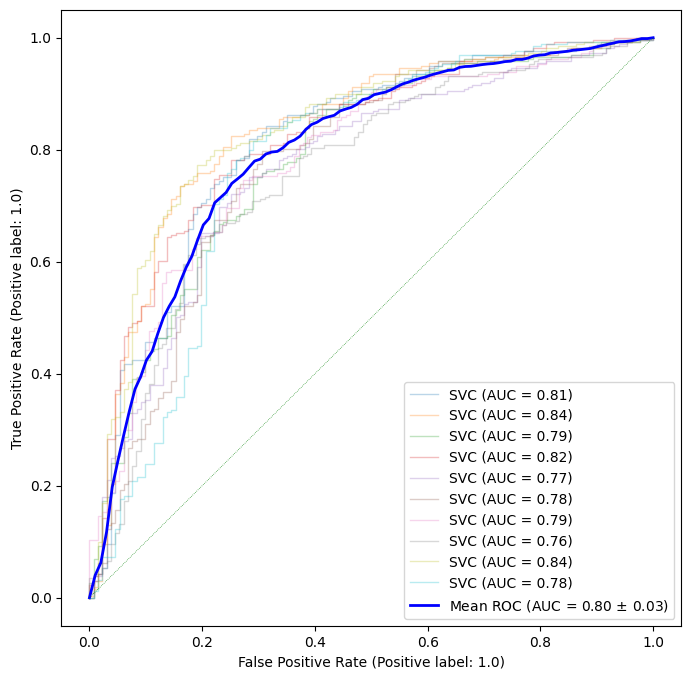

In [85]:
train_cv(var, X_train_cv, y_train_cv, X_test, y_test, config[3][0], config[3][1])

(SVC(degree=10, kernel='poly'), StandardScaler())

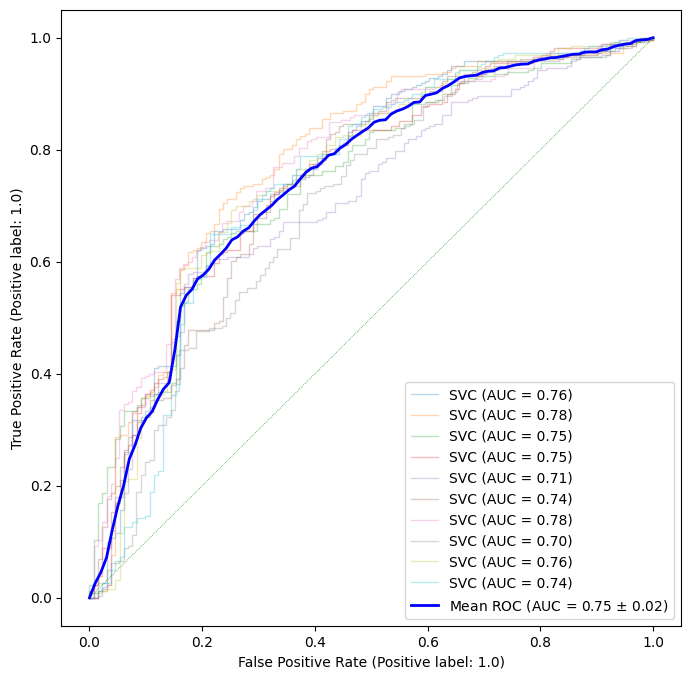

In [86]:
train_cv(var, X_train_cv, y_train_cv, X_test, y_test, config[4][0], config[4][1])

(LogisticRegression(), StandardScaler())

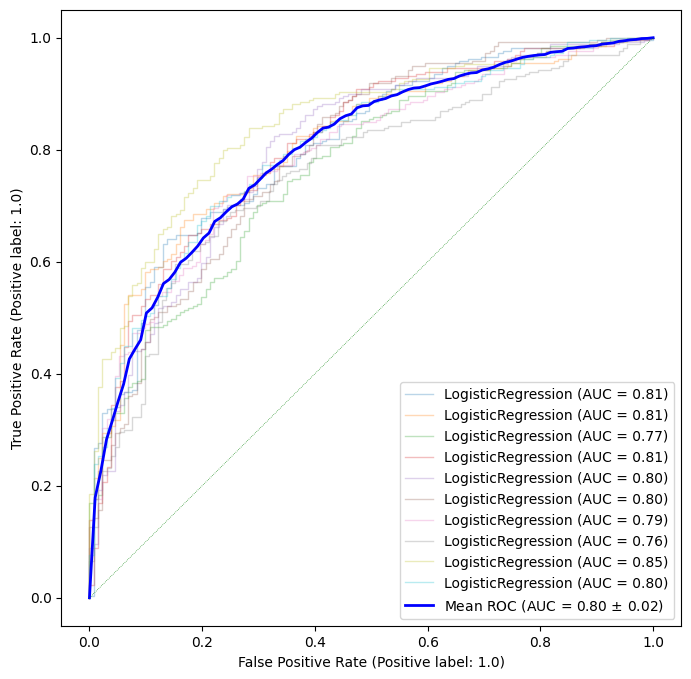

In [87]:
train_cv(var, X_train_cv, y_train_cv, X_test, y_test, config[5][0], config[5][1])

(DecisionTreeClassifier(min_samples_leaf=50), StandardScaler())

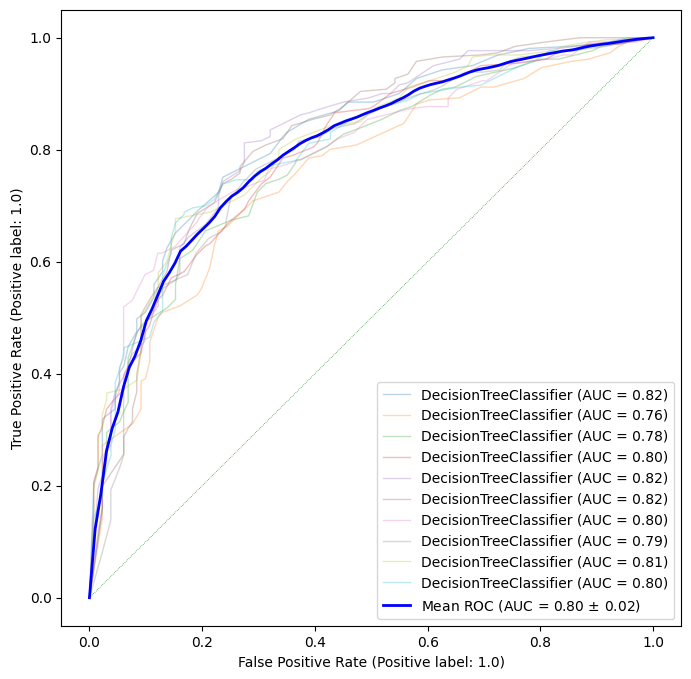

In [88]:
train_cv(var, X_train_cv, y_train_cv, X_test, y_test, config[6][0], config[6][1])

_____________________
## Usar o modelo e scaler do base RED para a base WHITE

In [89]:
var2 = 'red'
X_red, y_red = base(var2, vars)

In [90]:
X_red

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [91]:
X_scaled_red = best_scaler.transform(X_red)

c:\Users\claud\OneDrive\Documentos\Python\Coded\wine-predict\.venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [92]:
y_pred_white = best_model.predict(X_scaled_red)

In [93]:
red["pred"] = y_pred_white

In [94]:
red['pred'].value_counts().sort_values()

pred
1.0    1599
Name: count, dtype: int64

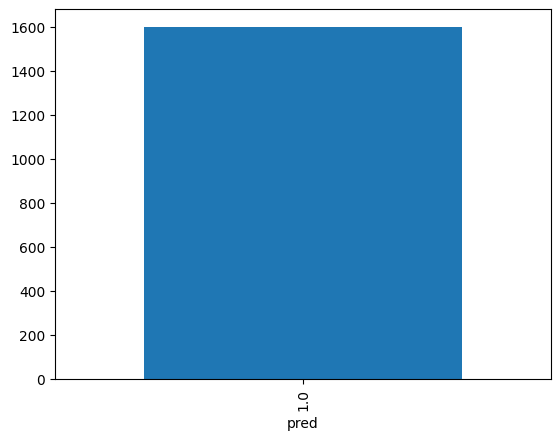

In [95]:
_ = red.pred.value_counts().sort_index().plot.bar(width=0.9)

______________
### Não é possível usar o mesmo modelo para diferentes tipos de vinhos pois os dois tem caracteristicas diferentes. Justamente pq um é branco, e outro tinto, se não, seriam todos a mesma coisa.